<a href="https://colab.research.google.com/github/MatthewC00273575/Data-Science/blob/master/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load data (download 'abalone.data' from UCI)
columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
           'viscera_weight', 'shell_weight', 'rings']
data = pd.read_csv('abalone.data', header=None, names=columns)

# Binarize rings: <10 young (0), >=10 old (1)
data['rings'] = (data['rings'] >= 10).astype(int)
X = data.drop('rings', axis=1)
y = data['rings']

# Encode sex categorical feature
X = pd.get_dummies(X, columns=['sex'], drop_first=True)  # sex_M, sex_I (sex_F as baseline)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (KNN is distance-based)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training samples: {X_train.shape[0]}, Features: {X_train.shape[1]}")
print(data['rings'].value_counts())  # ~60% young, 40% old

Training samples: 3341, Features: 9
rings
0    2096
1    2081
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Baseline KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Baseline k=5 Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Baseline k=5 Accuracy: 0.778


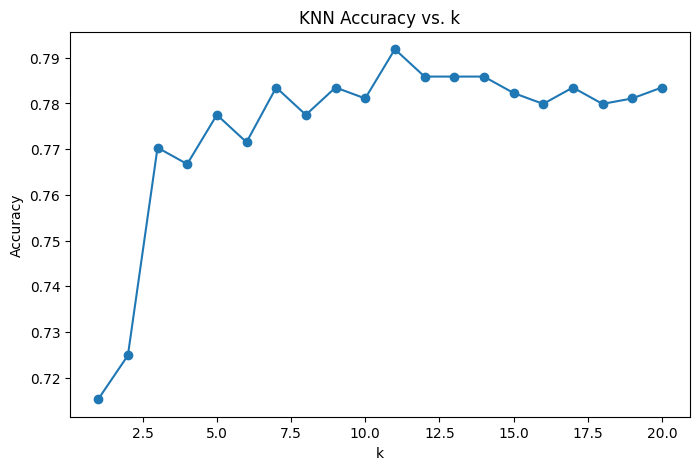

Best k: 11, Accuracy: 0.792


In [ ]:
import matplotlib.pyplot as plt

# Test different k values
k_values = range(1, 21)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.xlabel('k'); plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k')
plt.show()

# Best k
best_k = k_values[np.argmax(scores)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)
print(f"Best k: {best_k}, Accuracy: {accuracy_score(y_test, y_pred_best):.3f}")

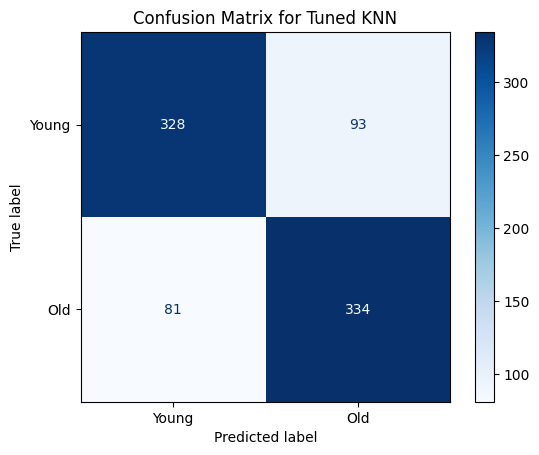

Tuned Accuracy: 0.792


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for best k
cm = confusion_matrix(y_test, y_pred_best, labels=[0, 1])
disp = ConfusionMatrixDisplay(cm, display_labels=['Young', 'Old'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Tuned KNN')
plt.show()

print(f"Tuned Accuracy: {accuracy_score(y_test, y_pred_best):.3f}")